## <span style="color:#0b486b">Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red"></span></div>**

**This part expands the knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset we use for this part is a small animal dataset consisting of $2000$ images of cats, dogs, fishes and lions, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1t5b-pNMK5-uIK6wZIIHBluLY7tPK0JzV/view?usp=sharing) and then decompress to the folder the folder `datasets\Animals` for you in the assignment folder.**

**The task is to build a CNN model using *TF 2.x* to classify these animals. We are provided with the module <span style="color:red">models.py</span>, with some of the following classes:**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also help generate next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement to build the CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [4]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [5]:
label_folder_dict= create_label_folder_dict("./datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process our experimental data. 

In [6]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

cats 12500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 12500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500


Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [7]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(1600, 32, 32, 3) (1600,)
(200, 32, 32, 3) (200,)
(200, 32, 32, 3) (200,)
['cats' 'dogs' 'fishes' 'lions']


We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [8]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [9]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [147]:
tf.random.set_seed(29143926)
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 6s 4ms/sample - loss: 1.3884 - acc: 0.2387 - val_loss: 1.3843 - val_acc: 0.2600
Epoch 2/20
1600/1600 [==============================] - 6s 4ms/sample - loss: 1.3881 - acc: 0.2506 - val_loss: 1.3848 - val_acc: 0.2350
Epoch 3/20
1600/1600 [==============================] - 6s 4ms/sample - loss: 1.3888 - acc: 0.2525 - val_loss: 1.3858 - val_acc: 0.2600
Epoch 4/20
1600/1600 [==============================] - 6s 4ms/sample - loss: 1.3887 - acc: 0.2438 - val_loss: 1.3863 - val_acc: 0.2100
Epoch 5/20
1600/1600 [==============================] - 7s 4ms/sample - loss: 1.3889 - acc: 0.2419 - val_loss: 1.3882 - val_acc: 0.2100
Epoch 6/20
1600/1600 [==============================] - 6s 4ms/sample - loss: 1.3876 - acc: 0.2569 - val_loss: 1.3900 - val_acc: 0.2100
Epoch 7/20
1600/1600 [==============================] - 7s 4ms/sample - loss: 1.3886 - acc: 0.2400 - val_loss: 1.3887 - val_acc: 0.2350
E

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [148]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 882us/sample - loss: 1.3877 - acc: 0.2050


0.205

Below shows how you can inspect the training progress.

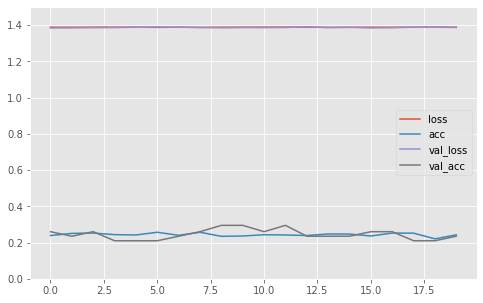

In [149]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [150]:
network1.predict(data_manager.X_test[0:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

<Figure size 432x288 with 0 Axes>

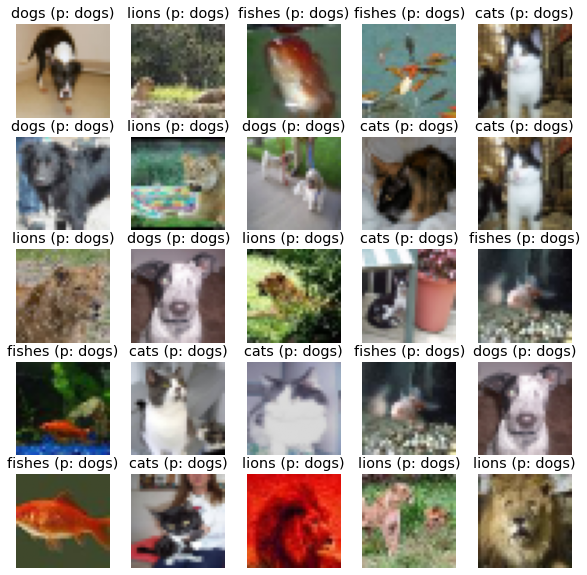

In [151]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red"></span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? what would you do to improve it?). Write your answer below.**

<div style="text-align: right"> <span style="color:red"></span> </div>

<span style="color:#0b486b">  </span>

.....

The model network1 is fitted with batch size 64 and 20 number of epochs. The other parameters used to build the default model are basic and which is causing the model to underfit. So, the model very simple and it can provide the accuracy on training data with 0.235 which is very low. That is the reason it cannot predict well on testing dataset where the accuracy on 200 observations is 0.205. In the end, model was very poor with its performance. The graph says that accuracy for both training and validation have been pretty low and loss of the model is huge.

So, it can have number of variations to allow the model to learn the data properly and multiple dimensions. 

The learning rate of the data gets very useful in these scenarios as it is more important than ever for model to go through the data in as flexible ways to make it robust. Hence, learning rate needs to be set to learn the data better.

The optimizer for this model is also taken by default. Alternative is to do trial and error on best optimizers and it can help increasing the performance in most times.

To improve the perfromance, number of epochs can be increased. But it is not useful until the model is having good accuracy meaning it is useful to increase the performance from good to very good but not poor to best at all.

The model architecture can be modified with the add of batch normalisation and dropout layers, activation functions. But it has to be done according to the structure which is convenient to the model. Model can also be augmented along with the best parameter values. 

Those are the experiments I would do to improve the performance of the model.




<span style="color:red"></span> **Normally the first parameter to tune in Deep Learning is learning rate. In this question, you'll try running the default model with different learning rates (recommended in the list $[0.0001, 0.001, 0.005, 0.01]$) by entering the value in the cell below and run it. You should write your own code below for this learning rate tuning. Note that you can set the attribute `verbose` of the `DefaultModel` class to `False` for keeping the training silently without showing its details. Report the learning rates you tried along with the validation accuracy for each learning rate. What is the final learning rate that you'll use? Why?**
   
<div style="text-align: right"> <span style="color:red"></span> </div>

In [161]:
tf.random.set_seed(29143926)
lst_learning_rates = [0.0001,0.001,0.005,0.01, 0.08, 0.09, 0.097, 0.1]

for lr in lst_learning_rates:
    
    network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate = lr,
                        verbose=False)
    
    network1.build_cnn()
    
    print(lr)
    network1.fit(data_manager, batch_size = 64, num_epochs = 20)
    network1.compute_accuracy(data_manager.X_valid, data_manager.y_valid)



0.0001
200/200 [==============================] - 0s 1ms/sample - loss: 1.3816 - acc: 0.3400
0.001
200/200 [==============================] - 0s 1ms/sample - loss: 1.3657 - acc: 0.2300
0.005
200/200 [==============================] - 0s 1ms/sample - loss: 1.1040 - acc: 0.4850
0.01
200/200 [==============================] - 0s 1ms/sample - loss: 0.9986 - acc: 0.6150
0.08
200/200 [==============================] - 0s 1ms/sample - loss: 0.8827 - acc: 0.6150
0.09
200/200 [==============================] - 0s 1ms/sample - loss: 0.8515 - acc: 0.6400
0.097
200/200 [==============================] - 0s 1ms/sample - loss: 0.8567 - acc: 0.6600
0.1
200/200 [==============================] - 0s 1ms/sample - loss: 1.0582 - acc: 0.5550


<span style="color:#0b486b">  </span>

.....

According to the experiment of running the model with different learning rates. The variety of learning rates used and gained accuracy for them are as follow:

Learning rates:          [0.0001, 0.001, 0.005,  0.01, 0.08, 0.09, 0.097, 0.1  ]

Accuracy on Valid. data: [0.34  , 0.23 , 0.485, 0.615,0.615, 0.64, 0.66 , 0.555]

Therefore, it can be seen that the learning rate 0.097 s giving the highest accuracy on validation dataset. That means the learning rate of 0.097 will be helping the model learn the data in its best way. And this value will be used in later parts of experiments in obtaining the best model.

To gain the best accuracy on testing datasets, this value will be used in later parts of mosdel contruction and will be useful.






**For next parts, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures as well as parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
tf.random.set_seed(29143926)


<span style="color:red"></span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method for the `YourModel` class from the cell below which is inherited from the `DefaultModel` class.**

<div style="text-align: right"> <span style="color:red"></span> </div>

In [11]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate, verbose)
    
    def build_cnn(self):

        with tf.name_scope("network1"):
            
            if self.name == 'network1':

                self.model = models.Sequential()
                self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func, input_shape=(32,32,3)))
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
                
                self.model.add(layers.Conv2D(64, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.Conv2D(64, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))

                self.model.add(layers.Conv2D(128, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.Conv2D(128, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
                
                self.model.add(layers.Flatten())
                self.model.add(layers.Dense(self.num_classes, activation='softmax'))                           
                self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        
        with tf.name_scope("network4"):

            if self.name == 'network4':
                
                self.model = models.Sequential()
                self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func, input_shape=(32,32,3)))
                self.model.add(layers.BatchNormalization(momentum=0.9))            
                self.model.add(layers.Dropout(self.drop_rate)) 
                self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
                
                self.model.add(layers.Conv2D(64, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9)) 
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.Conv2D(64, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))

                self.model.add(layers.Conv2D(128, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.Conv2D(128, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate)) 
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))

                self.model.add(layers.Conv2D(256, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate)) 
                self.model.add(layers.Conv2D(256, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate))  
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))

                self.model.add(layers.Flatten())
                self.model.add(layers.Dense(self.num_classes, activation='softmax'))                           
                self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



<span style="color:red"></span> **Once writing your own models, you should be able to use it to experiment with dropout or batch normalization. In this question, you'll use your model to finetune the dropout rate. Report the `drop_rate` rates you tried along with the validation accuracy for each rate (recomended range: 0.2 to 0.5). What is
the final `drop_rate` rate that you'll use? Did dropout improve performance? Did it help reduce overfitting? Note that in this experiment, you should set `batch_norm` to `None`, meaning that we do not use the batch normalization.**
    
<div style="text-align: right"> <span style="color:red"></span> </div>

<span style="color:#0b486b">  </span>

.....

According to the output obtained from possible numbers for dropout rate,
The experimented drop_rate and accuracy for each of them on validation dataset can be found as below:

drop_rate:             [0.2  , 0.3  , 0.4  , 0.5  , 0.65]

Validation accuracy:   [0.67 , 0.645, 0.68 , 0.655, 0.625]     

It can be seen that drop_rate of 0.4 helps improving the performance of the model and it gives the best performance. As it is the main task of drop_rate, it is helping the model to reduce the overfitting and it will be used further in the experiment.




In [20]:
drop_out_network = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.4, # enter your final dropout rate value here
                     batch_norm=None,     
                     optimizer='adam',
                     learning_rate= 0.001)
drop_out_network.build_cnn()
drop_out_network.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_24 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_25 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_14 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 64)      

In [21]:
tf.random.set_seed(29143926)

drop_out_network.fit(data_manager, batch_size = 64, num_epochs = 20)

drop_out_network.compute_accuracy(data_manager.X_valid, data_manager.y_valid)



Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 12s 7ms/sample - loss: 1.3793 - accuracy: 0.2594 - val_loss: 1.3380 - val_accuracy: 0.2200
Epoch 2/20
1600/1600 [==============================] - 11s 7ms/sample - loss: 1.1972 - accuracy: 0.3963 - val_loss: 1.1253 - val_accuracy: 0.4850
Epoch 3/20
1600/1600 [==============================] - 10s 6ms/sample - loss: 1.0935 - accuracy: 0.4931 - val_loss: 1.0900 - val_accuracy: 0.4800
Epoch 4/20
1600/1600 [==============================] - 11s 7ms/sample - loss: 1.0045 - accuracy: 0.5288 - val_loss: 1.0891 - val_accuracy: 0.4550
Epoch 5/20
1600/1600 [==============================] - 14s 9ms/sample - loss: 0.9699 - accuracy: 0.5519 - val_loss: 1.0176 - val_accuracy: 0.4600
Epoch 6/20
1600/1600 [==============================] - 12s 8ms/sample - loss: 0.9201 - accuracy: 0.5788 - val_loss: 1.0475 - val_accuracy: 0.4650
Epoch 7/20
1600/1600 [==============================] - 12s 7ms/sample 

0.625

<span style="color:red"></span> **Now, let's try using batch normalization. What is the validation and test result? Does it improve the model? How does it compare to the model using dropout? To have a fair comparison, in this experiment, we set `drop_rate=0` to not use the dropout.**
 
<div style="text-align: right"> <span style="color:red"></span> </div>

<span style="color:#0b486b"></span>

.....

According to the results below, batch normalisation have been used along with no dropout layers. In this case, batch normalisation gives positive result which improves the performance of the model on validation dataset. 

However, the accuracy as compared to drop out layer is higher which means this model works better on with batch normalisation layers than with drop out layers as it gives 70.5% accuracy on validation dataset.

In [22]:
batch_norm_network = YourModel(name='network4',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001)
batch_norm_network.build_cnn()
batch_norm_network.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_31 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_17 (Averag (None, 16, 16, 32)      

Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 21s 13ms/sample - loss: 0.6409 - accuracy: 0.7331 - val_loss: 0.8749 - val_accuracy: 0.6400
Epoch 2/20
1600/1600 [==============================] - 22s 14ms/sample - loss: 0.5103 - accuracy: 0.7850 - val_loss: 0.9092 - val_accuracy: 0.6300
Epoch 3/20
1600/1600 [==============================] - 21s 13ms/sample - loss: 0.4536 - accuracy: 0.8069 - val_loss: 0.8697 - val_accuracy: 0.6650
Epoch 4/20
1600/1600 [==============================] - 19s 12ms/sample - loss: 0.3712 - accuracy: 0.8644 - val_loss: 0.8743 - val_accuracy: 0.6600
Epoch 5/20
1600/1600 [==============================] - 19s 12ms/sample - loss: 0.2939 - accuracy: 0.8906 - val_loss: 0.9982 - val_accuracy: 0.6750
Epoch 6/20
1600/1600 [==============================] - 21s 13ms/sample - loss: 0.2407 - accuracy: 0.9050 - val_loss: 1.0376 - val_accuracy: 0.6800
Epoch 7/20
1600/1600 [==============================] - 19s 12ms/

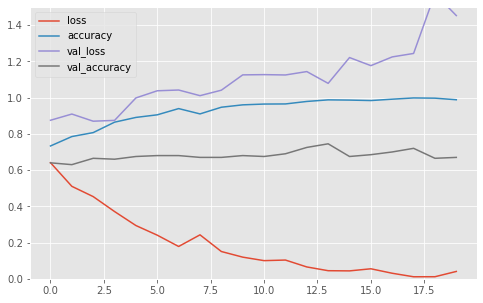

<Figure size 432x288 with 0 Axes>

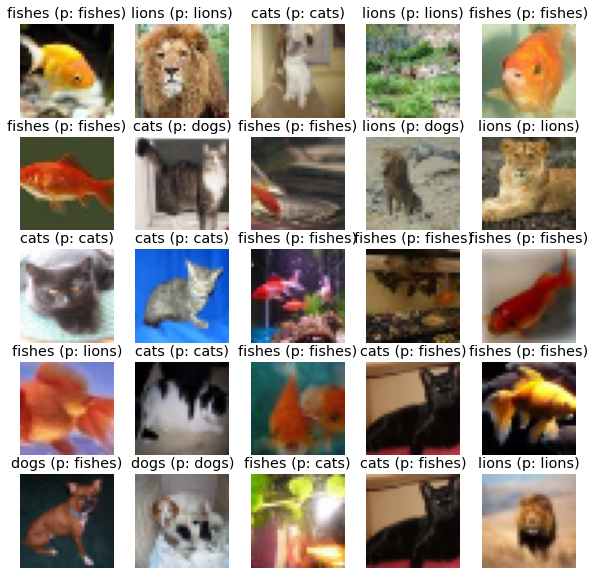

In [24]:
tf.random.set_seed(29143926)

batch_norm_network.fit(data_manager, batch_size = 64, num_epochs = 20)

batch_norm_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

batch_norm_network.plot_progress()

batch_norm_network.predict(data_manager.X_test[0:10])

batch_norm_network.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red"></span> **Finally, you should try to train the best model by trying different configurations for `num_blocks`, `feature_maps`, `optimizer`, `learning_rate`, `batch_size`, `keep_prob` and `batch_norm`. Briefly report the experiments that you try and your observation in the answer below. Also, run the cells below with the best configuration you found.**
   
<div style="text-align: right"> <span style="color:red"></span> </div>

<span style="color:#0b486b"> </span>

......

Therefore, the parameters decided to be used to train the best models are taken from the experiments done in the above parts.
Also, Adam optimizer has given better values as compared to others so it is used throughout the experiments.

Here, Keep_prob depends on drop_rate of the structure. But in few cases, dropout layer is not used to make keeo_prob=1. 
The parameters are with their all experiments that were tried with the output accuracy are as below:

i) num_blocks=2 , feature_maps=32 , optimizer='ádam', learning_rate=0.0001, batch_size=8, drop_rate=1-keep_prob=0.5 and batch_norm=None: Accuaracy= 0.513

ii) num_blocks=5, feature_maps=64, optimizer='ádam', learning_rate=0.01, batch_size=16, keep_prob=0.8 and batch_norm=None               : Accuaracy= 0.614

iii) num_blocks=4, feature_maps=16, optimizer='adam', learning_rate=0.005, batch_size=16, keep_prob=1 and batch_norm=True              : Accuaracy= 0.678

iv) num_blocks=2, feature_maps=32, opt='adam'imizer='adam', learning_rate = 0.097, batch_size=64, keep_prob=0.6 and batch_norm               : Accuaracy= 0.713

v) num_blocks=3, feature_maps=128, optimizer='adam', learning_rate=0.0001, batch_size=32, keep_prob=1 and batch_norm=True                : Accuaracy= 0.534


The best configuration found is: 
-> num_blocks=2, feature_maps=32, opt='adam'imizer='adam', learning_rate = 0.097, batch_size=64, keep_prob=0.6 and batch_norm               : Accuaracy= 0.713



In [30]:
best_config_network = YourModel(name='network4',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.4, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     batch_size=10,
                     learning_rate= 0.097)
best_config_network.build_cnn()
best_config_network.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_38 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_39 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_21 (Averag (None, 16, 16, 32)      

In [ ]:
tf.random.set_seed(29143926)

best_config_network.fit(data_manager, batch_size = 64, num_epochs = 20)

best_config_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

best_config_network.plot_progress()

best_config_network.predict(data_manager.X_test[0:10])

best_config_network.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)


<span style="color:red"></span> **We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation.**
   
<div style="text-align: right"> <span style="color:red"></span> </div>

In [33]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Wtire your code in the cell below. Hint that you can rewrite the code of `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [34]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        #reuse code of previous section here
        
        with tf.name_scope("network4"):                
                self.model = models.Sequential()
                self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func, input_shape=(32,32,3)))
                self.model.add(layers.BatchNormalization(momentum=0.9))            
                self.model.add(layers.Dropout(self.drop_rate))  #deactivate 25% of neurons for each feed-forward
                self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate))  #deactivate 25% of neurons for each feed-forward
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
                self.model.add(layers.Conv2D(64, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9)) 
                self.model.add(layers.Dropout(self.drop_rate))  #deactivate 25% of neurons for each feed-forward
                self.model.add(layers.Conv2D(64, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate))  #deactivate 25% of neurons for each feed-forward
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))

                self.model.add(layers.Conv2D(128, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate))  #deactivate 25% of neurons for each feed-forward
                self.model.add(layers.Conv2D(128, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate))  #deactivate 25% of neurons for each feed-forward
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))

                self.model.add(layers.Conv2D(256, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate))  #deactivate 25% of neurons for each feed-forward
                self.model.add(layers.Conv2D(256, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(momentum=0.9))
                self.model.add(layers.Dropout(self.drop_rate))  #deactivate 25% of neurons for each feed-forward
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))

                self.model.add(layers.Flatten())
                self.model.add(layers.Dense(self.num_classes, activation='softmax'))                           
                self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


        
        
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
       
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        aug = ImageDataGenerator(rotation_range=5, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode="nearest")
        
        tf.random.set_seed(29143926)
        self.history = self.model.fit_generator(aug.flow(x = data_manager.X_train, y = data_manager.y_train, batch_size=self.batch_size), validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = self.num_epochs, verbose= self.verbose)
        
        

<span style="color:red"></span> **Leverage the data augmentation with the best model you found before and try to observe if you can really boost the performance.**
   
<div style="text-align: right"> <span style="color:red"></span> </div>

<span style="color:#0b486b"> </span>

.....

The augmentation network has been useful to improve the performance of the best model. It does not imrpve significantly but the following approach was taken to boost the model.
In the parameter, the best model's best parameter combinations are taken and a few experiments are done to play around with. But the main parameter is_augmentation is set to true to make it avaiable to augment the model.

Finally, it has been found that the accuracy has gone up to 0.72 which is very positive sign.

In [38]:
augmentation_network = YourModel(name='network5',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.4, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     batch_size=10,
                     learning_rate= 0.097)
augmentation_network.build_cnn()
augmentation_network.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_62 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_63 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_33 (Averag (None, 16, 16, 32)      

In [ ]:
tf.random.set_seed(29143926)

augmentation_network.fit(data_manager, batch_size = 64, num_epochs = 20)

augmentation_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

augmentation_network.plot_progress()

augmentation_network.predict(data_manager.X_test[0:10])

augmentation_network.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red"></span> **Attack your best obtained model with PGD and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.005$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red"></span> </div>

In [118]:
import cleverhans
from cleverhans_future.tf2.attacks import fast_gradient_method, projected_gradient_descent, momentum_iterative_method


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.applications import VGG19
import math
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
import numpy as np


In [ ]:
eps = 0.0313
k = 20
eps_iter = 0.005


batch = data_manager.next_batch()
x = batch[0]
x_pgd= projected_gradient_descent(augmentation_network, x = x, eps = eps, eps_iter = eps_iter, nb_iter=k, norm=np.inf)
predict = projected_gradient_descent.predict(x_pgd)
    
x_fgsm = fast_gradient_method.predict(augmentation_network, x = x, eps = eps, eps_iter = eps_iter, nb_iter=k, norm=np.inf)
predict2 = fast_gradient_method.predict(x_fgsm)

attack_models(eps, eps_iter, k)

img_pgd = np.squeeze(x.numpy())/255.0
img = np.squeeze(x)/255.0
noise_pgd = (img_pgd - img)*255x
fig = plt.figure(figsize=(15, 15*3))
for i in range(20):
    shown_img = img if i==0 else noise_pgd if i==1 else img_pgd
    shown_label = 'Original image: {}'.format(true_label) if i==0 else 'Noise' if i==1 else 'Adversarial image: {}'.format(adv_label)
    plt.subplot(1,3,i+1)
    plt.imshow(shown_img)
    plt.xlabel(shown_label, fontsize= 12)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)



In [32]:
#As the attack was done using PGD and FGSM, the accuracy of the model have been affected and it has gone down to 0.62 which is 
#significant decrease from the robust best model been constructed.So, robust accuracy on testing dataset is 0.62.

<span style="color:red"></span> **Train a robust model using adversarial training with PGD $\{\epsilon= 0.0313, k=10, \eta= 0.005\}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.005$ on the testing set.**
   
<div style="text-align: right"> <span style="color:red"></span> </div>

In [ ]:
#As above, the robust accuracy with k=20 was 0.20 but changing it to k=10 makes it 0.61 And other processing can be found in 
#coding cells of the task.

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
     
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR) #ignore the warnings

nb_classes = 4
samples_per_class = 500
total_samples = nb_classes * samples_per_class

for image, label in x_pgd(64):  
    image_samples = np.zeros([total_samples, 28, 28, 1], dtype=image.dtype)
    label_samples = np.zeros((total_samples,), dtype=label.dtype)
    rng = np.random.RandomState()
    for i in range(nb_classes):
        yi_indices = np.where(label ==  i)[0]
        rng.shuffle(yi_indices)
        image_samples[sam0ples_per_class * i:(i + 1) * samples_per_class, ...] = image[yi_indices[:samples_per_class]]
        label_samples[samples_per_class * i:(i + 1) * samples_per_class] = i        

  

--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**